In [10]:
#loading packages for data analysis and visualization 
library(tidyverse)
library(repr)
library(tidymodels)

In [11]:
#initial data loading
players <- read_csv("https://raw.githubusercontent.com/jamiekyh/project_indiv/refs/heads/main/players.csv")
head(players)

sessions <- read_csv("https://raw.githubusercontent.com/jamiekyh/project_indiv/refs/heads/main/sessions.csv")
head(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


### (1) DATA DESCRIPTION

In [12]:
#players.csv

#number of observations/variables
number_obv_players <- nrow(players)
number_obv_players
print("Number of Observations (players.csv) = 196")

number_var_players <- ncol(players)
number_var_players
print("Number of Variables (players.csv) = 7")

number_obv_sessions <- nrow(sessions)
number_obv_sessions
print("Number of Observations (sessions.csv) = 1535")

number_var_sessions <- ncol(sessions)
number_var_sessions
print("Number of Variables (sessions.csv) = 5")

#summary statistics
stats_mean <- players |>
    select(played_hours, Age) |>
    map_dfr(mean, na.rm = TRUE) |>
    as.data.frame()
colnames(stats_mean) <- c("Mean Duration Played (hours)", "Mean Age of Participants")
stats_mean

stats_min <- players |>
    select(played_hours, Age) |>
    map_dfr(min, na.rm = TRUE) |>
    as.data.frame()
colnames(stats_min) <- c("Minimum Duration Played (hours)", "Minimum Age of Participants")
stats_min

stats_max <- players |>
    select(played_hours, Age) |>
    map_dfr(max, na.rm = TRUE) |>
    as.data.frame()
colnames(stats_max) <- c("Maximum Duration Played (hours)", "Maximum Age of Participants")
stats_max

[1] 196

[1] "Number of Observations (players.csv) = 196"


[1] 7

[1] "Number of Variables (players.csv) = 7"


[1] 1535

[1] "Number of Observations (sessions.csv) = 1535"


[1] 5

[1] "Number of Variables (sessions.csv) = 5"


Mean Duration Played (hours),Mean Age of Participants
<dbl>,<dbl>
5.845918,20.52062


Minimum Duration Played (hours),Minimum Age of Participants
<dbl>,<dbl>
0,8


Maximum Duration Played (hours),Maximum Age of Participants
<dbl>,<dbl>
223.1,50


#### Players Dataset (players.csv)

There are 196 observations and 7 variables, indicating that 196 participants contributed to the recorded data.       
Each observation contains information about a unique player, stored in the variables described in the following table:

| Variable | Data Type | Meaning |
|----------|--------------|----------|
| experience | character | gives the experience of the player, categorized into five types including "Beginner", "Amateur", "Regular", "Pro", and "Veteran"|
| subscribe | logical | indicates whether the player is subscribed to a game-related newsletter |
| hashedEmail | character | stores the hashed email of the player, which can be used as a unique identifier for each participant |
| played_hours | double | records the total duration each participant spent on the game during the research period |
| name | character | stores the name by which the player identifies themselves with |
| gender | character | stores the gender that the player identifies as |
| Age | double | stores the self-reported age of each player |

Summary statistics of quantitative variables are listed below:

| Variable | Mean | Min | Max |
|----------|------|-----|-----|
| played_hours | 5.8459 | 0 |223.1 |
| Age | 20.5206 | 8 | 50 |


#### Sessions Dataset (sessions.csv)

There are 1535 observations and 5 variables, indicating that 1535 playing sessions were recorded during data collection.      
Each observation contains information about a unique playing session, stored in the variables described in the following table:

| Variable | Data Type | Meaning |
|----------|--------------|----------|
| hashedEmail | character | stores the hashed email of the player, which identifies which participant contributed to each playing session |
| start_time | character | records the start time of the playing session in DD/MM/YYYY format |
| end_time | character | records the end time of the playing session in DD/MM/YYYY format |
| original_start_time | double | records the start time of the playing session in UNIX format |
| original_end_time | double | records the end time of the playing session in UNIX format |


#### Data Collection

These datasets were collected by the PLAI research group through the plaicraft.ai site.         
Participants register using their email, then report their name, gender, and playing experience for data collection and player identification.      


#### Issues

There are several issues in the two datasets. 

First of all, the datasets are not in tidy formats.   
In the players.csv file, players' experiences are coded in character type data. Since experience can be ranked, it should be in factor type instead, with the ranking of "Beginner" being least experienced, followed by "Amateur", "Regular", "Pro", and finally "Veteran" with the most experience.     
The sessions.csv file is also untidy since the start_time and end_time columns contain the year, month, date, hour, and minute of the observation in the same value. Instead, these should all have their individual variables, such as start_year, start_month, and so on.     
To ease the process of data manipulation, it is highly beneficial to wrangle these raw datasets into tidy formats. This is done in section (3) of this proposal.

Another potential issue stems from inaccuracies in the collected data.     
As age and experience are self-reported by the participant, with a default age of 17, the data could be skewed by reporting bias.      
It is impossible to confirm this given the amount of data provided, but acknowledging possibel bias highlights the fact that results from our project might not be representative of the real-life situation.


### (2) PROPOSAL QUESTION

This project will address question 2: whether certain "kinds" of players are more likely to contribute a large amount of gaming data.        
In particular, the model will answer the specific research question of **"can player age and player experience predict playing duration?"**

The dataset contains data on the total amount of time contributed by each player, as well as their age and experience.           
By analysing trends in playing time with regards to player age and experience, we can identify whether individuals of certain ages or experience levels are more likely to contribute more playing time. If there is a correlation, then we can focus on recruiting players of those specific groups as more playing time contributes more data, in order to obtain more data out of less participants.           
This can be achieved through building a regression model that predicts playing time from player age and experience. 

However, the data has to be wrangled before regression can be performed.           
Besides tidying the data as mentioned, player experience has to be converted into numerical data.             
Each category will be converted into a numerical value from 1-5 that corresponds to the degree of experience, with 1 being the least experienced (Beginner) and 5 being the most experienced (Veteran), then used in the regression model to predict playing time.

### (3) EXPLORATORY DATA ANLAYSIS, VISUALISATION

#### Datasets are loaded into R

In [13]:
#loading datasets into R
players <- read_csv("https://raw.githubusercontent.com/jamiekyh/project_indiv/refs/heads/main/players.csv")
head(players)
sessions <- read_csv("https://raw.githubusercontent.com/jamiekyh/project_indiv/refs/heads/main/sessions.csv")
head(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


#### Datasets are wrangled into tidy formats

In [14]:
#wrangling data into tidy format
tidy_players <- players |>
    mutate(experience = factor(experience, levels = c("Beginner", "Amateur", "Regular", "Pro", "Veteran")))
head(tidy_players)

tidy_sessions <- sessions |>
    separate(col = start_time, into = c("start_date", "start_time"), sep = "\ ") |>
    separate(col = start_date, into = c("start_day", "start_month", "start_year"), sep = "/") |>
    separate(col = start_time, into = c("start_hour", "start_minute"), sep = ":") |>
    separate(col = end_time, into = c("end_date", "end_time"), sep = "\ ") |>
    separate(col = end_date, into = c("end_day", "end_month", "end_year"), sep = "/") |>
    separate(col = end_time, into = c("end_hour", "end_minute"), sep = ":")   
head(tidy_sessions)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_day,start_month,start_year,start_hour,start_minute,end_day,end_month,end_year,end_hour,end_minute,original_start_time,original_end_time
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30,06,2024,18,12,30,06,2024,18,24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17,06,2024,23,33,17,06,2024,23,46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25,07,2024,17,34,25,07,2024,17,57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25,07,2024,03,22,25,07,2024,03,58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25,05,2024,16,01,25,05,2024,16,12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23,06,2024,15,08,23,06,2024,17,10,1.71916e+12,1.71916e+12


#### Mean values for quantitative variables

In [15]:
#mean of quantitative variables
mean_quantitative <- tidy_players |>
    select(played_hours, Age) |>
    map_dfr(mean, na.rm = TRUE) |>
    as.data.frame()
colnames(mean_quantitative) <- c("Mean Duration Played (hours)", "Mean Participant Age")
    
mean_quantitative

Mean Duration Played (hours),Mean Participant Age
<dbl>,<dbl>
5.845918,20.52062


#### Exploratory visualizations

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_count()`).”


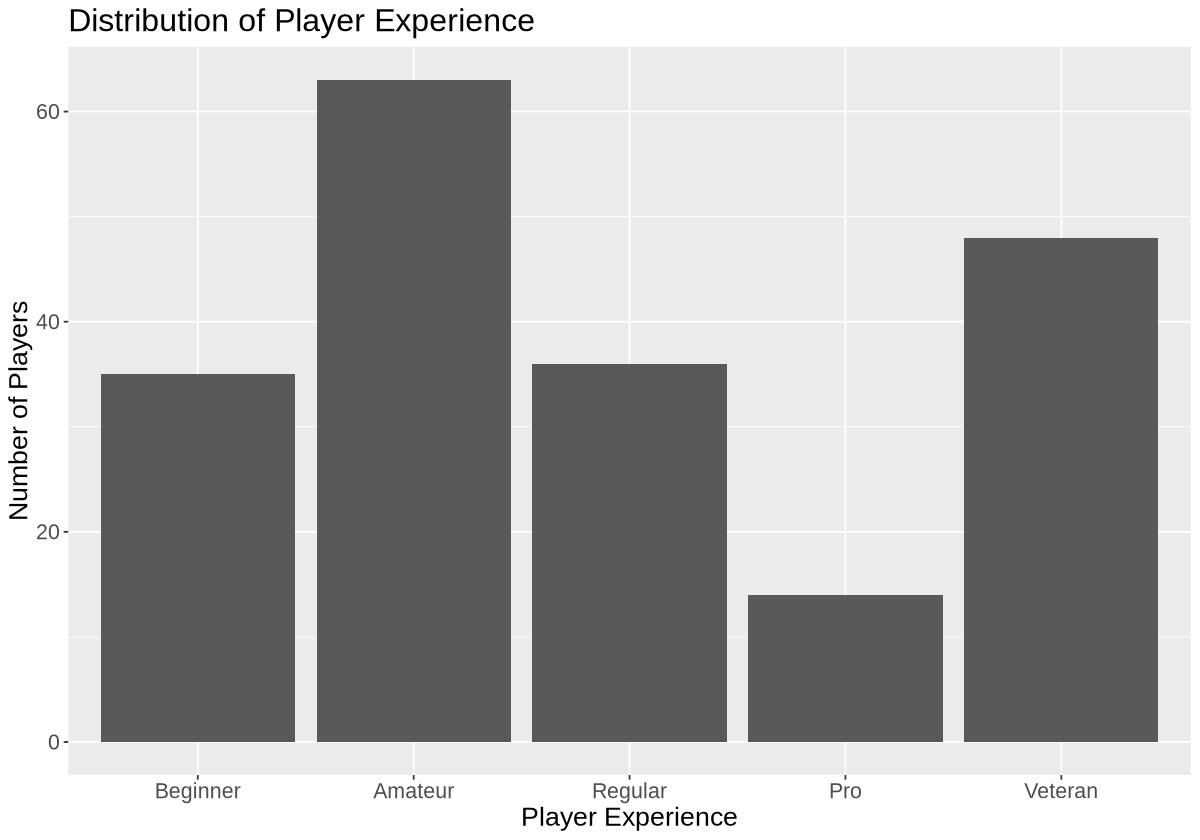

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


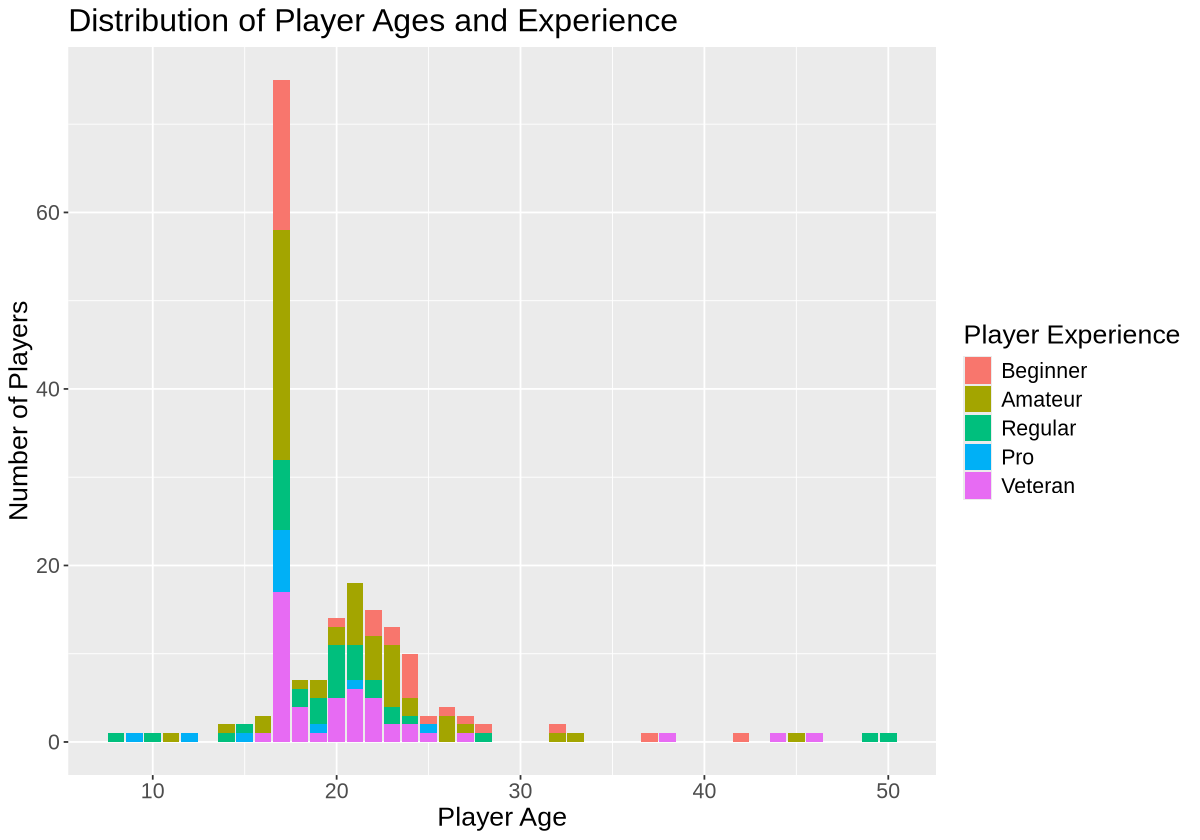

played_hours
<dbl>
56.1


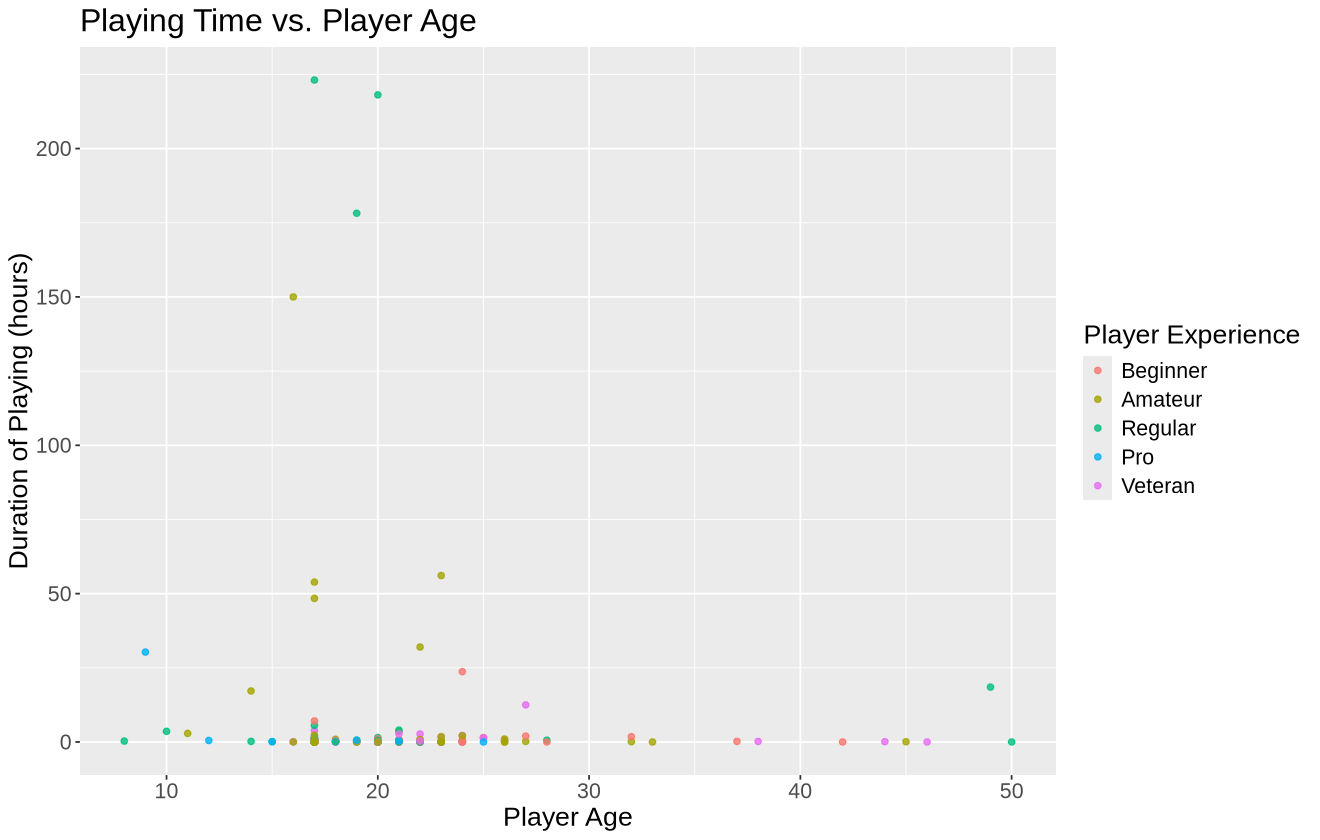

In [16]:
#visualizations
options(repr.plot.width = 10, repr.plot.width = 10)


#distribution of player experience
player_exp_dist <- tidy_players |>
    ggplot(aes(x = experience)) +
        geom_bar(stat = "count") +
        labs(x = "Player Experience", y = "Number of Players", title = "Distribution of Player Experience") +
        theme(text = element_text(size = 16))
player_exp_dist


#distribution of player age and experience
player_ageexp_dist <- tidy_players |>
    ggplot(aes(x = Age, fill = experience)) +
        geom_bar(stat = "count") +
        labs(x = "Player Age", y = "Number of Players", fill = "Player Experience", title = "Distribution of Player Ages and Experience") +
        theme(text = element_text(size = 16))
player_ageexp_dist


#playing time vs player age, coloured by player experience
options(repr.plot.width = 11, repr.plot.width = 11)

time_age_dist <- tidy_players |>
    ggplot(aes(x = Age, y = played_hours, color = experience)) +
        geom_point(alpha = 0.8) +
        labs(x = "Player Age", y = "Duration of Playing (hours)", 
             color = "Player Experience", title = "Playing Time vs. Player Age") +
        theme(text = element_text(size = 16))
time_age_dist


#data of fifth player by descending played duration
fifthmost <- tidy_players |>
    arrange(-played_hours) |>
    slice(5) |>
    select(played_hours)
fifthmost

#### Relevant insights from visualizations

1. The mode for player age is 17, occurring at more than two times the frequency of the second most common age. This aligns with the default age during player registration, which hints at possible reporting bias as explained in the "Issues" subsection of section (1).
2. There is an uneven distribution of player experiences and that among different ages in the given data. This should be taken into account when forming the training/testing sets for building classification or regression models.
3. There are four high outliers in terms of playing time, with `played_hours`>150, compared to <57 for all other participants (shown by `fifthmost` code). This may result in skewed data, with these participants' data dominating trends in recorded observations.


### (4) METHODS AND PLAN

To answer the research question, I will build a **k-nn regression model** using the *players.csv* dataset that predicts playing duration using player age and player experience as predictors.              
If there is a relatively small RMSPE, then our model can predict playing duration from player age and experience.        

Since the predicted variable is numerical and quantitative, a regression model is appropriate.               
Due to the unknown linearity of the relationship, k-nn regression, which has more flexibility in terms of data shape, will be used instead of linear regression.      
However, limitations of the k-nn model restricts our model from performing as well on data outside of the training model's data range, such as observations with player age greater than 50. Working with 196 observations in a k-nn regression model also means that the model might be relatively slow.     
For results to be relevant, it is assumed that reporting bias does not affect trends and relationships observed, and that future observations input into the model will mostly have players younger than 50 years old.

#### Steps
* player experience (`experience`) will be coded by numeric levels, from 1 = "Beginner" to 5 = "Veteran".
* the dataset will be split into training and testing sets, with 0.75 training and 0.25 proportions, before any modelling procedure is carried out
* in a k-nn regression model, playing duration (`played_hours`) will be predicted by player age (`Age`) and player experience (`experience`), with the `Age` predictor centered and scaled
* 5-fold cross-validation will be carried out to determine the number of neighbours with the lowest RMSE
* the model will then be retrained using that number of neighbours, and the testing data will be fitted to determine the RMSPE